# Handwritten number classification

## by Yasin Shafiei

### Project discription:
This project uses a CNN model to classify handwritten digits in the `MNIST` dataset.

### 1. Read and ready the data

In [15]:
# import libraries
import tensorflow as tf
from keras import datasets
from keras import layers
from keras.models import *
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
# define hyperparameters
EPOCHS = 10
NUM_CLASSES = 10

In [3]:
# load the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [4]:
# show some informations about the data
print(f"Number of training examples: {len(train_images)}")
print(f"Number of testing examples: {len(test_images)}")
print(f"Shape of images: {train_images[0].shape}")

Number of training examples: 60000
Number of testing examples: 10000
Shape of images: (28, 28)


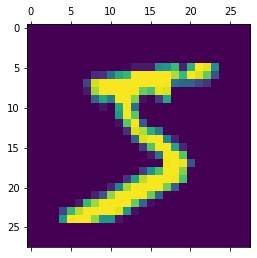

In [5]:
# show a sample of the dataset 
plt.matshow(train_images[0])

### 2. Normalize the images

In [6]:
# Normalize the train dataset
train_images = tf.keras.utils.normalize(train_images, axis=1)
# Normalize the test dataset
test_images = tf.keras.utils.normalize(test_images, axis=1)

### 3. CNN Model

In [7]:
# define the model
model = Sequential()

# conv, max pooling layer 1
model.add(layers.Conv2D(32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# hidden layer 1
model.add(layers.Dense(256, activation = "relu"))

#hidden layer 2
model.add(layers.Dense(256, activation = "relu"))

# dropout 
model.add(layers.Dropout(0.1))

# output layer 
model.add(layers.Dense(10, activation = "softmax"))

In [8]:
# see the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 256)               1605888   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [9]:
# compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### 4. Train the model

In [10]:
# fit the model to training
model.fit(train_images, train_labels, epochs = EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1818 - accuracy: 0.9445
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0586 - accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0362 - accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0244 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0183 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0124 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0086 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0106 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 23s 12m

### 5. Draw the confusion matrix

Text(69.0, 0.5, 'Truth')

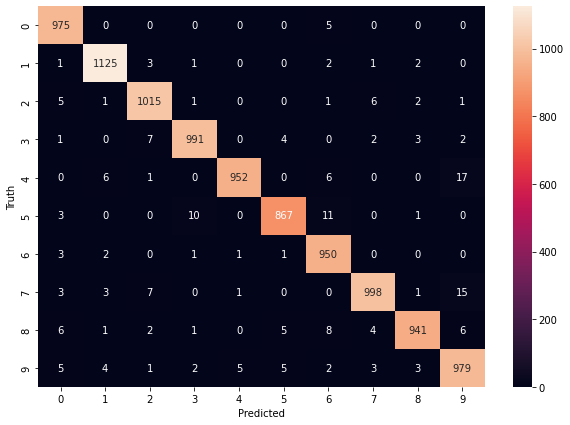

In [16]:
# make model to predict
prediction = model.predict(test_images)
prediction_labels = [np.argmax(i) for i in prediction]

# calculate the confusion matrix
matrix = tf.math.confusion_matrix(labels = test_labels, predictions = prediction_labels)

# plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 6. Evaluate the model

In [17]:
# make model to predict (again 😎) and see the loss and accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# print the loss and accuracy of predictions
print(f"\nTest accuracy: {test_accuracy}\nTest loss: {test_loss}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1043 - accuracy: 0.9793

Test accuracy: 0.9793000221252441
Test loss: 0.10432043671607971


The prediction accuracy is very good. Now lets see some of the predictions

### 7. See the predictions

In [20]:
# make model to predict again 😂
predictions = model.predict([test_images])

# see the predictions label
print(np.argmax(predictions[100]))

6


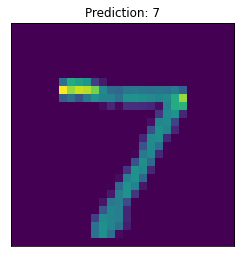

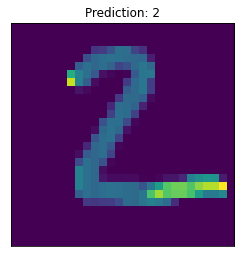

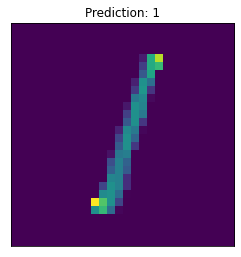

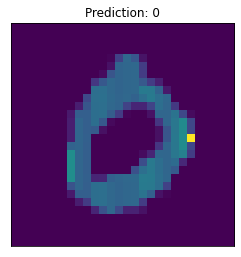

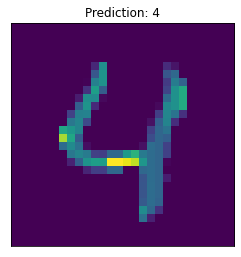

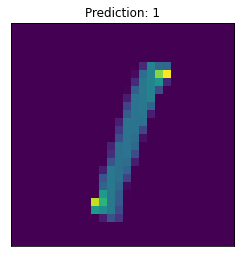

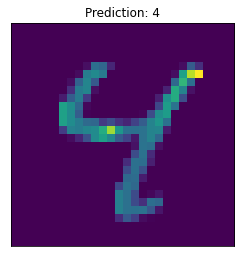

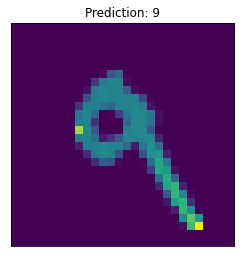

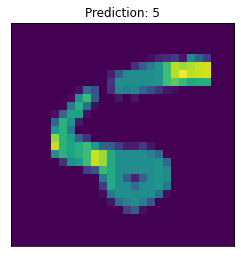

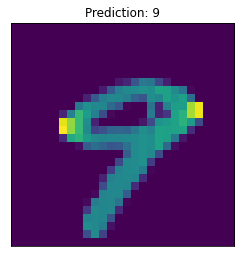

In [33]:
for i in range(10):
    
    plt.matshow(test_images[i])
    plt.title(f"Prediction: {np.argmax(predictions[i])}")
    plt.xticks([])
    plt.yticks([])